In [1]:
import ipywidgets
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
from matplotlib import rcParams
import random as rd
import warnings

from collections import Counter

## Recreate Kirami Code

In [2]:
from generate_homophilic_graph_symmetric import homophilic_ba_graph

### Degree distirbution (histogram)

In [3]:
def plot_single_graph_degree(G, title="Log–Log Degree Distribution"):
    """
    Plot the degree distribution of a single homophilic BA graph.

    Parameters:
        G (networkx.Graph): The graph to plot.
        title (str): Plot title.
    """
    degrees = dict(G.degree())
    red_degrees = [degrees[n] for n in G.nodes if G.nodes[n]['color'] == 'red']
    blue_degrees = [degrees[n] for n in G.nodes if G.nodes[n]['color'] == 'blue']

    red_dist = Counter(red_degrees)
    blue_dist = Counter(blue_degrees)

    plt.figure(figsize=(8, 5))
    plt.scatter(*zip(*sorted(blue_dist.items())), label='Majority (blue)', color='blue', alpha=0.7)
    plt.scatter(*zip(*sorted(red_dist.items())), label='Minority (orange)', color='orange', alpha=0.7)

    plt.xlabel("Degree (log)")
    plt.ylabel("Number of Nodes (log)")
    plt.xscale("log")
    plt.yscale("log")
    plt.title(title)
    plt.legend()
    plt.grid(True, which="both", linestyle="--", linewidth=0.5)
    plt.show()

In [4]:

from collections import Counter, defaultdict
def get_degree_counts(G):
    degrees = dict(G.degree())
    red_degrees = [degrees[n] for n in G.nodes if G.nodes[n]['color'] == 'red']
    blue_degrees = [degrees[n] for n in G.nodes if G.nodes[n]['color'] == 'blue']
    return Counter(red_degrees), Counter(blue_degrees)

def average_degree_distributions(graphs):
    red_totals = defaultdict(list)
    blue_totals = defaultdict(list)

    for G in graphs:
        red_dist, blue_dist = get_degree_counts(G)

        for deg, count in red_dist.items():
            red_totals[deg].append(count)

        for deg, count in blue_dist.items():
            blue_totals[deg].append(count)

    # Average the counts
    avg_red = {deg: np.mean(counts) for deg, counts in red_totals.items()}
    avg_blue = {deg: np.mean(counts) for deg, counts in blue_totals.items()}

    return avg_red, avg_blue

def plot_avg_distribution(avg_red, avg_blue):
    plt.figure(figsize=(8, 5))
    plt.scatter(*zip(*sorted(blue_dist.items())), label='Majority (blue)', color='blue', alpha=0.7)
    plt.scatter(*zip(*sorted(red_dist.items())), label='Minority (orange)', color='orange', alpha=0.7)
    plt.xlabel("Degree (log)")
    plt.ylabel("Avg Number of Nodes (log)")
    plt.xscale("log")
    plt.yscale("log")
    plt.title("Average Log–Log Degree Distribution (5 Graphs)")
    plt.legend()
    plt.grid(True, which="both", linestyle="--", linewidth=0.5)
    plt.show()

### Degree distribution (frequency)

In [5]:
def plot_frequency_distribution(G):
    degrees = dict(G.degree())
    red_degrees = [degrees[n] for n in G.nodes if G.nodes[n]['color'] == 'red']
    blue_degrees = [degrees[n] for n in G.nodes if G.nodes[n]['color'] == 'blue']

    red_dist = Counter(red_degrees)
    blue_dist = Counter(blue_degrees)

    total_red = len(red_degrees)
    total_blue = len(blue_degrees)
    total = total_red+total_blue

    red_freq = {k: v / total for k, v in red_dist.items()}
    blue_freq = {k: v / total for k, v in blue_dist.items()}

    plt.figure(figsize=(8, 5))
    plt.scatter(*zip(*sorted(blue_freq.items())), label='Majority (blue)', color='blue', alpha=0.7)
    plt.scatter(*zip(*sorted(red_freq.items())), label='Minority (orange)', color='orange', alpha=0.7)
    plt.xlabel("Degree (log)")
    plt.ylabel("Frequency (log)")
    plt.xscale("log")
    plt.yscale("log")
    plt.legend()
    plt.grid(True, which="both", linestyle="--", linewidth=0.5)
    plt.show()


In [6]:

def average_frequency_distribution(graphs):
    red_freq = defaultdict(list)
    blue_freq = defaultdict(list)

    for G in graphs:
        degrees = dict(G.degree())

        red_nodes = [n for n in G.nodes if G.nodes[n]["color"] == "red"]
        blue_nodes = [n for n in G.nodes if G.nodes[n]["color"] == "blue"]

        red_degrees = [degrees[n] for n in red_nodes]
        blue_degrees = [degrees[n] for n in blue_nodes]

        red_dist = Counter(red_degrees)
        blue_dist = Counter(blue_degrees)

        red_total = len(red_nodes)
        blue_total = len(blue_nodes)
        total = red_total  + blue_total 

        for k, v in red_dist.items():
            red_freq[k].append(v / total)
        for k, v in blue_dist.items():
            blue_freq[k].append(v / total)

    # Average frequencies across all graphs
    avg_red = {k: np.mean(v) for k, v in red_freq.items()}
    avg_blue = {k: np.mean(v) for k, v in blue_freq.items()}

    # Plot
    plt.figure(figsize=(8, 5))
    plt.scatter(*zip(*sorted(avg_blue.items())), label='Majority (blue)', color='blue', alpha=0.7)
    plt.scatter(*zip(*sorted(avg_red.items())), label='Minority (orange)', color='orange', alpha=0.7)

    plt.xlabel("Degree (log)")
    plt.ylabel("Frequency (log)")
    plt.xscale("log")
    plt.yscale("log")
    plt.legend()
    plt.grid(True, which="both", linestyle="--", linewidth=0.5)
    plt.show()


## Homophily = 0.0

In [7]:
graphs0 = []

for seed in range(5):
    G = homophilic_ba_graph(N=5000, m=2, minority_fraction=0.2, homophily=0.0, seed=seed)
    graphs0.append(G)

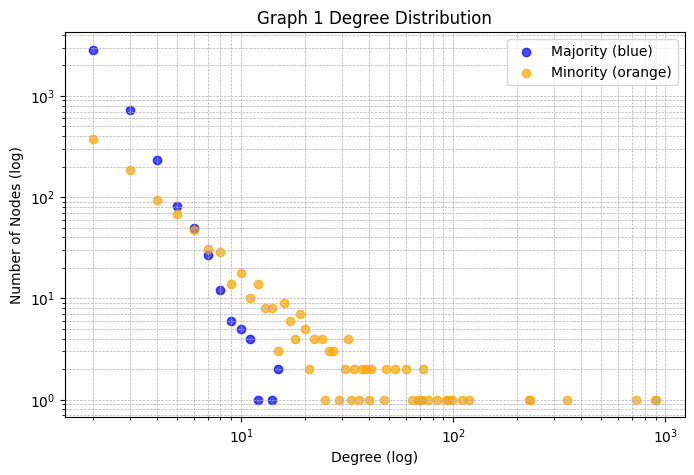

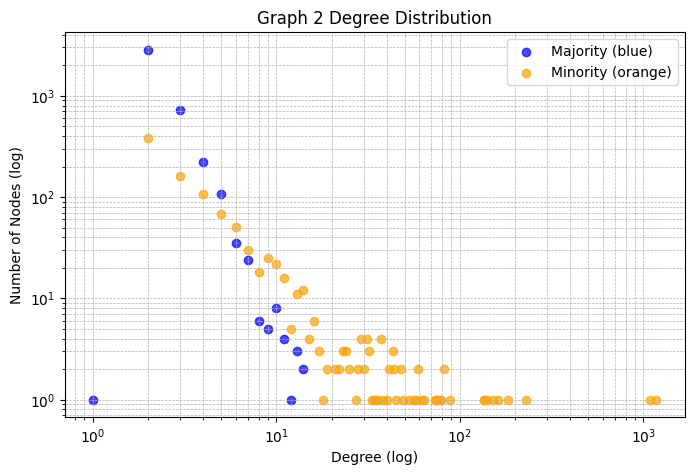

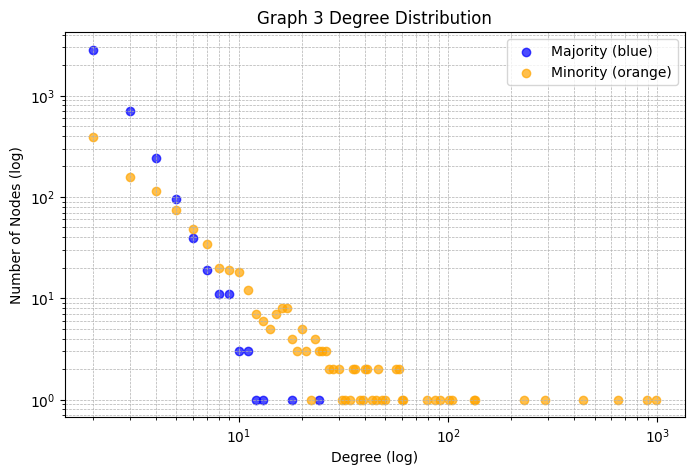

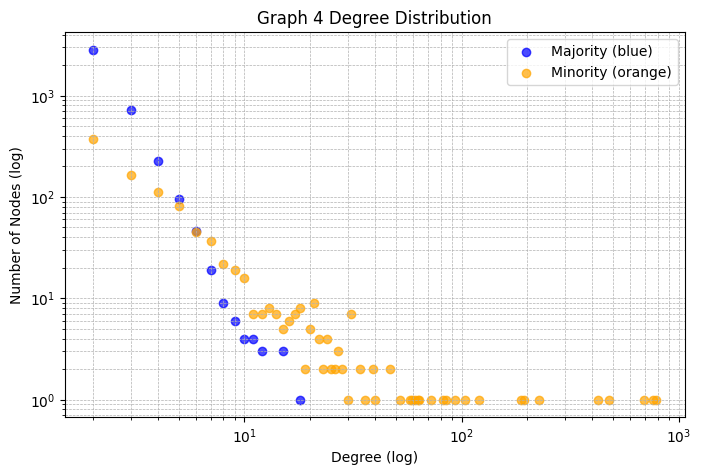

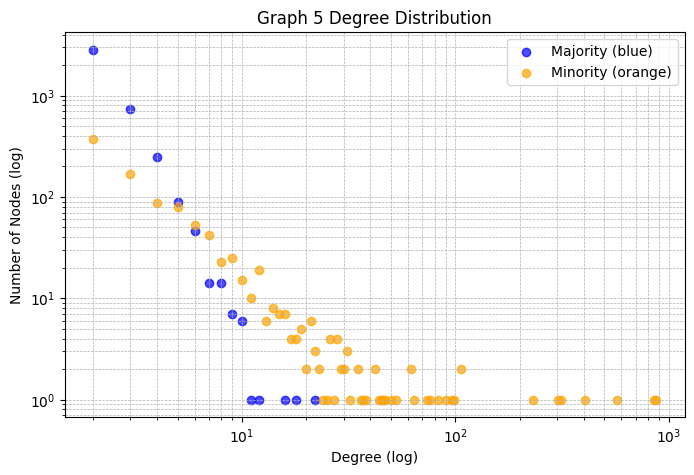

In [8]:
for i, G in enumerate(graphs0):
    plot_single_graph_degree(G, title=f"Graph {i+1} Degree Distribution")

In [9]:


def plot_frequency_distribution(G):
    degrees = dict(G.degree())
    red_degrees = [degrees[n] for n in G.nodes if G.nodes[n]['color'] == 'red']
    blue_degrees = [degrees[n] for n in G.nodes if G.nodes[n]['color'] == 'blue']

    red_dist = Counter(red_degrees)
    blue_dist = Counter(blue_degrees)

    total_red = len(red_degrees)
    total_blue = len(blue_degrees)
    total = total_red+total_blue

    red_freq = {k: v / total for k, v in red_dist.items()}
    blue_freq = {k: v / total for k, v in blue_dist.items()}

    plt.figure(figsize=(8, 5))
    plt.scatter(*zip(*sorted(blue_freq.items())), label='Majority (blue)', color='blue', alpha=0.7)
    plt.scatter(*zip(*sorted(red_freq.items())), label='Minority (orange)', color='orange', alpha=0.7)
    plt.xlabel("Degree (log)")
    plt.ylabel("Frequency (log)")
    plt.xscale("log")
    plt.yscale("log")
    plt.legend()
    plt.grid(True, which="both", linestyle="--", linewidth=0.5)
    plt.show()


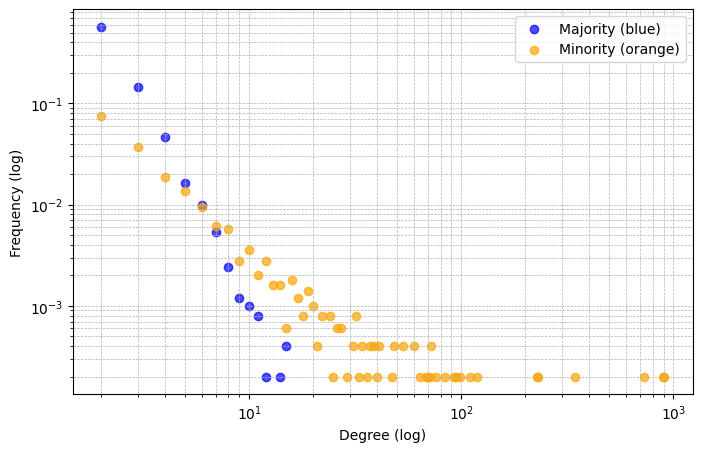

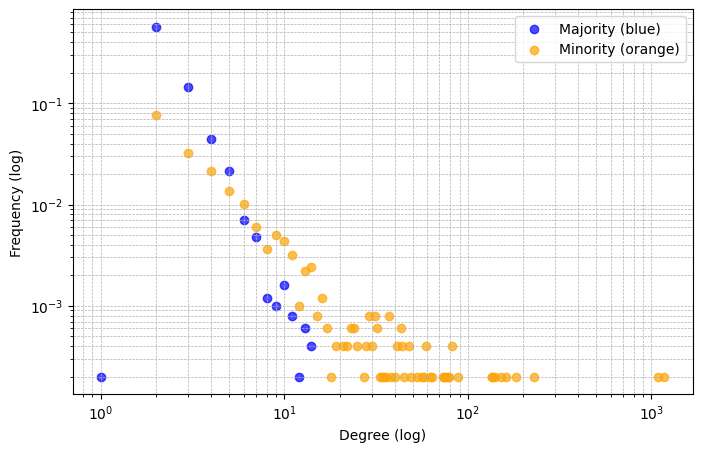

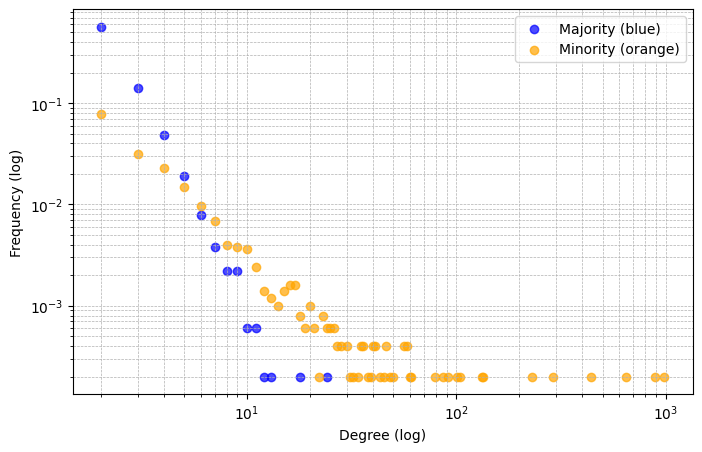

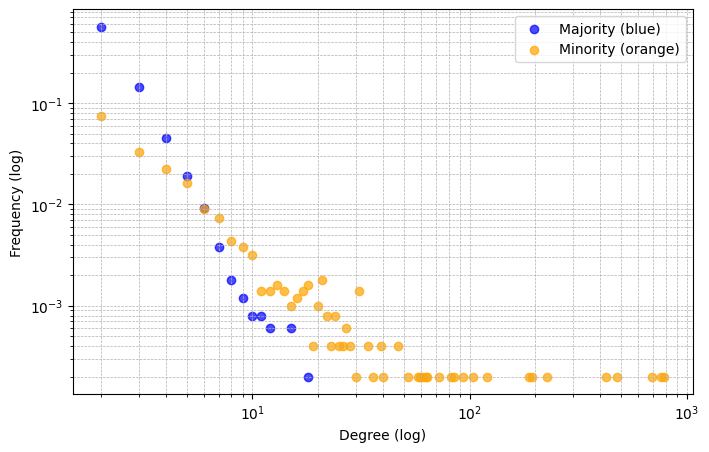

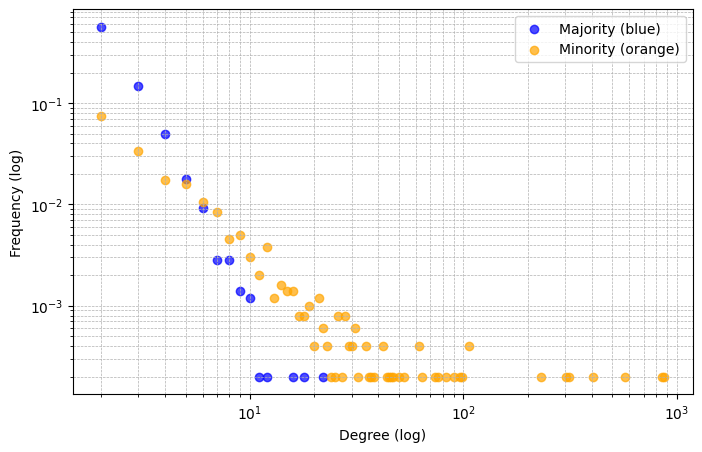

In [10]:
for i, G in enumerate(graphs0):

    plot_frequency_distribution(G)


## Average

In [11]:
def plot_average_degree_distribution(graphs):
    total_red_dist = defaultdict(int)
    total_blue_dist = defaultdict(int)

    for G in graphs:
        degrees = dict(G.degree())
        red_degrees = [degrees[n] for n in G.nodes if G.nodes[n]['color'] == 'red']
        blue_degrees = [degrees[n] for n in G.nodes if G.nodes[n]['color'] == 'blue']
        
        red_dist = Counter(red_degrees)
        blue_dist = Counter(blue_degrees)

        for k, v in red_dist.items():
            total_red_dist[k] += v
        for k, v in blue_dist.items():
            total_blue_dist[k] += v

    num_graphs = len(graphs)
    avg_red_dist = {k: v / num_graphs for k, v in total_red_dist.items()}
    avg_blue_dist = {k: v / num_graphs for k, v in total_blue_dist.items()}

    # Plot
    plt.figure(figsize=(8, 5))
    plt.scatter(*zip(*sorted(avg_blue_dist.items())), label='Majority (blue)', alpha=0.7, color='blue')
    plt.scatter(*zip(*sorted(avg_red_dist.items())), label='Minority (orange)', alpha=0.7, color='orange')
    plt.xlabel("Degree (log)")
    plt.ylabel("Average Number of Nodes (log)")
    plt.xscale("log")
    plt.yscale("log")
    plt.legend()
    plt.grid(True, which="both", linestyle="--", linewidth=0.5)
    plt.show()

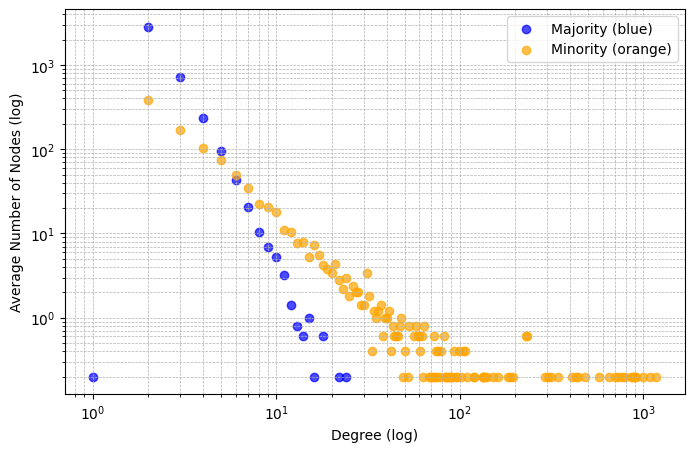

In [12]:
plot_average_degree_distribution(graphs0)

In [13]:

def average_frequency_distribution(graphs, title=None, savefile=None):
    red_freq = defaultdict(list)
    blue_freq = defaultdict(list)

    for G in graphs:
        degrees = dict(G.degree())

        red_nodes = [n for n in G.nodes if G.nodes[n]["color"] == "red"]
        blue_nodes = [n for n in G.nodes if G.nodes[n]["color"] == "blue"]

        red_degrees = [degrees[n] for n in red_nodes]
        blue_degrees = [degrees[n] for n in blue_nodes]

        red_dist = Counter(red_degrees)
        blue_dist = Counter(blue_degrees)

        red_total = len(red_nodes)
        blue_total = len(blue_nodes)
        total = red_total + blue_total 

        for k, v in red_dist.items():
            red_freq[k].append(v / total)
        for k, v in blue_dist.items():
            blue_freq[k].append(v / total)

    # Average frequencies across all graphs
    avg_red = {k: np.mean(v) for k, v in red_freq.items()}
    avg_blue = {k: np.mean(v) for k, v in blue_freq.items()}

    # Plot
    plt.figure(figsize=(8, 5))
    plt.scatter(*zip(*sorted(avg_blue.items())), label='Majority (blue)', color='blue', alpha=0.7)
    plt.scatter(*zip(*sorted(avg_red.items())), label='Minority (orange)', color='orange', alpha=0.7)
    plt.xlabel("Degree (log)")
    plt.ylabel("Frequency (log)")
    plt.xscale("log")
    plt.yscale("log")
    if title is not None:
        plt.title(title)
    plt.legend()
    plt.grid(True, which="both", linestyle="--", linewidth=0.5)
    plt.tight_layout()
    if savefile is not None:
        plt.savefig(savefile, dpi=300)
    plt.show()
    plt.close()
    return avg_red, avg_blue

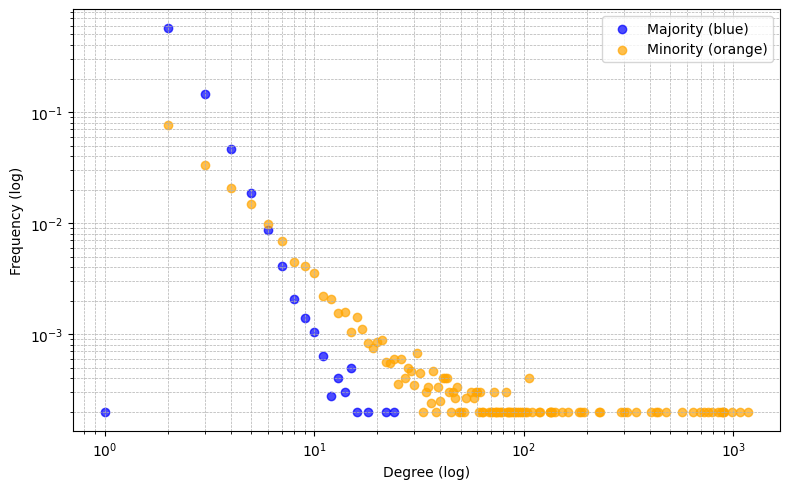

({899: 0.0002,
  0: 0.0002,
  728: 0.0002,
  908: 0.0002,
  84: 0.0002,
  344: 0.0002,
  228: 0.0002,
  72: 0.00030000000000000003,
  231: 0.0002,
  40: 0.00025,
  76: 0.0002,
  119: 0.0002,
  70: 0.0002,
  68: 0.0002,
  34: 0.00030000000000000003,
  99: 0.0002,
  17: 0.0011200000000000001,
  60: 0.00030000000000000003,
  24: 0.0006000000000000001,
  31: 0.00068,
  36: 0.00024000000000000003,
  33: 0.0002,
  32: 0.00045000000000000004,
  37: 0.0004666666666666667,
  53: 0.0002666666666666667,
  71: 0.0002,
  25: 0.00036,
  95: 0.0002,
  16: 0.0014399999999999999,
  93: 0.0002,
  20: 0.0008500000000000001,
  39: 0.0003333333333333333,
  2: 0.07579999999999999,
  29: 0.00046666666666666666,
  27: 0.0004,
  10: 0.00356,
  48: 0.0003333333333333333,
  13: 0.00156,
  6: 0.00976,
  41: 0.0004,
  64: 0.0002,
  8: 0.00448,
  3: 0.03372,
  5: 0.014879999999999999,
  110: 0.0002,
  26: 0.0006,
  22: 0.00056,
  15: 0.00104,
  47: 0.0002666666666666667,
  19: 0.00076,
  18: 0.0008400000000000001,


In [14]:
average_frequency_distribution(graphs0)

All homophily value with 20 trials 

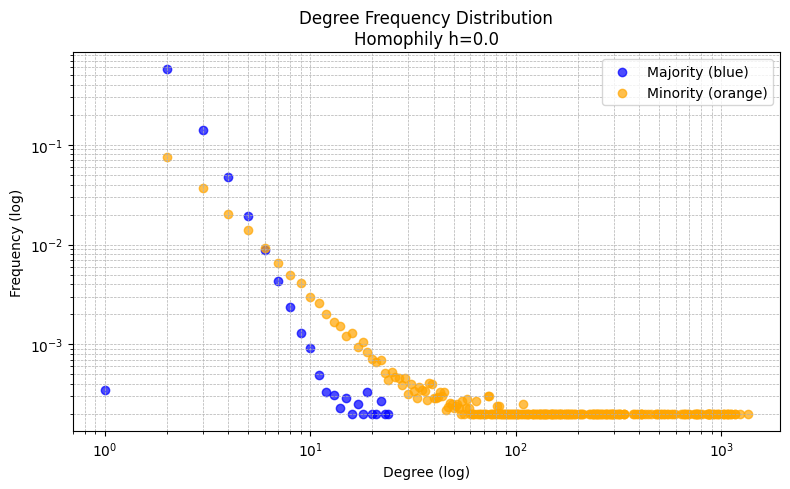

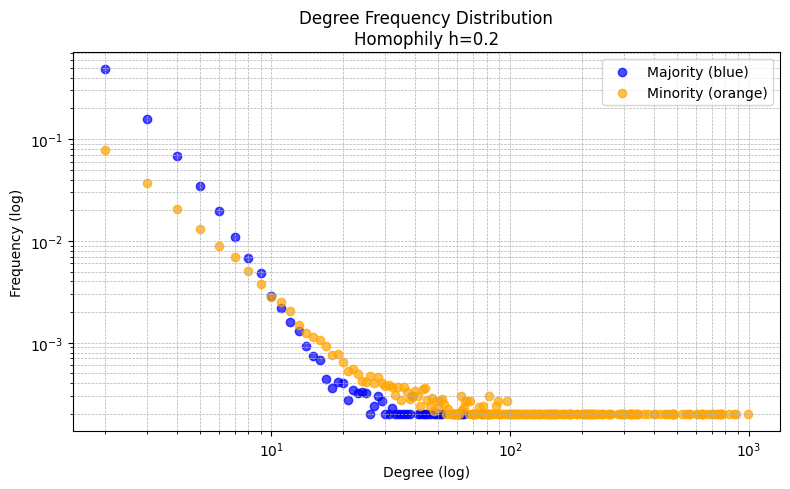

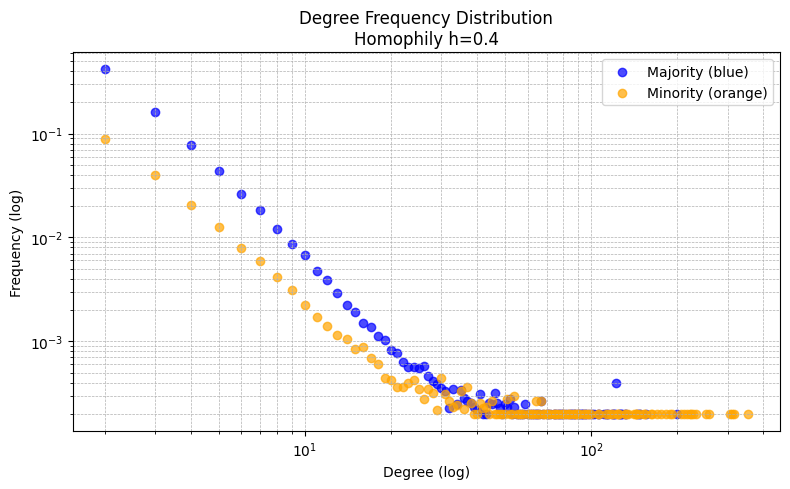

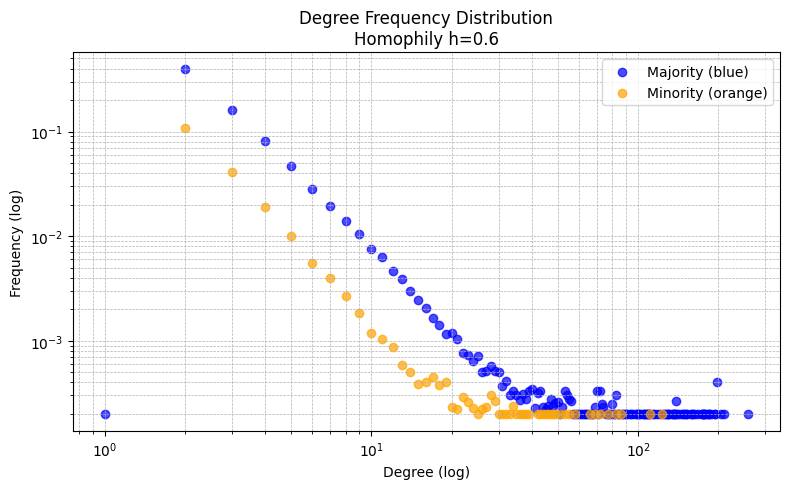

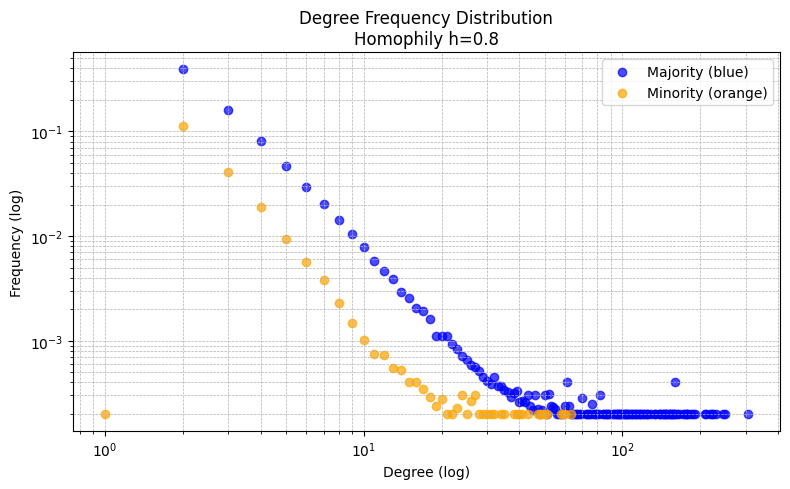

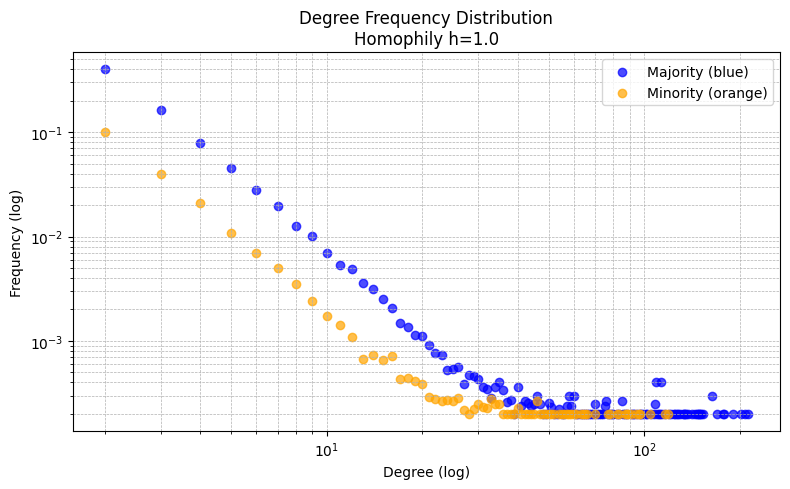

All plots saved.


In [16]:
# Parameters
homophily_values = [0.0, 0.2, 0.4, 0.6, 0.8, 1.0]
num_trials = 20
seed_start = 145
seeds = list(range(seed_start, seed_start + num_trials))

# Loop over homophily values
for h in homophily_values:
    graphs = []
    for seed in seeds:
        G = homophilic_ba_graph(N=5000, m=2, minority_fraction=0.2, homophily=h, seed=seed)  # <-- use your graph generator
        graphs.append(G)
    title = f"Degree Frequency Distribution\nHomophily h={h}"
    savefile = f"degree_freq_h_{h:.1f}.png"
    average_frequency_distribution(graphs, title=title, savefile=savefile)

print("All plots saved.")
